<a href="https://colab.research.google.com/github/Tienspkt/BaiTapAI03/blob/main/BaiTap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=291b70e63fd2463847ac8875d0f8defd2f9e42d10bc407d7918304d77d6c45e1
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
x= np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])

print(x)
print(mfx)

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]


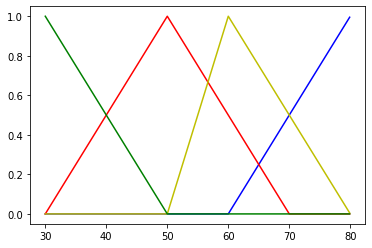

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x= np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium= fuzz.trimf(x,[30,50,70])
medium_fist = fuzz.trimf(x,[50,60,80])
full_speed= fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,"b", linewidth =1.5, label ="Full Speed")
plt.plot(x,medium,"r", linewidth=1.5, label="Medium")
plt.plot(x, medium_fist,"y", linewidth=1.5, label="Medium_Fist")
plt.plot(x, slow,"g", linewidth=1.5, label="Slow")
     

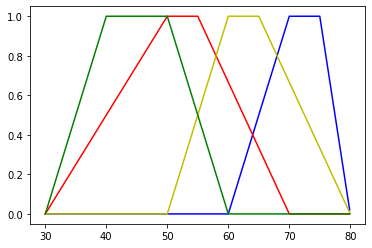

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x= np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,40,50,60])
medium= fuzz.trapmf(x,[30,50,55,70])
medium_fist = fuzz.trapmf(x,[50,60,65,80])
full_speed= fuzz.trapmf(x,[60,70,75,80])
plt.figure()
plt.plot(x,full_speed,"b", linewidth =1.5, label ="Full Speed")
plt.plot(x,medium,"r", linewidth=1.5, label="Medium")
plt.plot(x, medium_fist,"y", linewidth=1.5, label="Medium_Fist")
plt.plot(x, slow,"g", linewidth=1.5, label="Slow")

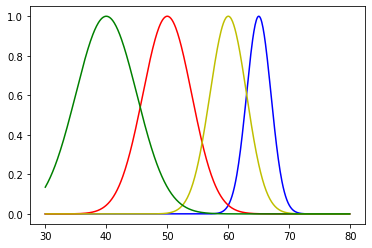

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x= np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,40,5) ## gaussmf(x,a,c)
medium= fuzz.gaussmf(x,50,4)
medium_fist = fuzz.gaussmf(x,60,3)
full_speed= fuzz.gaussmf(x,65,2)
plt.figure()
plt.plot(x,full_speed,"b", linewidth =1.5, label ="Full Speed")
plt.plot(x,medium,"r", linewidth=1.5, label="Medium")
plt.plot(x, medium_fist,"y", linewidth=1.5, label="Medium_Fist")
plt.plot(x, slow,"g", linewidth=1.5, label="Slow")

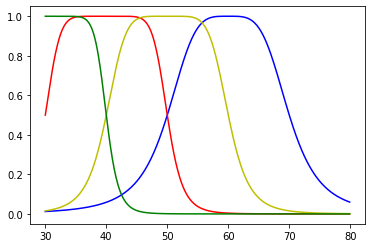

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x= np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,10,5,30)
medium= fuzz.gbellmf(x,10,4,40)
medium_fist = fuzz.gbellmf(x,10,3,50)
full_speed= fuzz.gbellmf(x,10,2,60)
plt.figure()
plt.plot(x,full_speed,"b", linewidth =1.5, label ="Full Speed")
plt.plot(x,medium,"r", linewidth=1.5, label="Medium")
plt.plot(x, medium_fist,"y", linewidth=1.5, label="Medium_Fist")
plt.plot(x, slow,"g", linewidth=1.5, label="Slow")

8.312222222222227


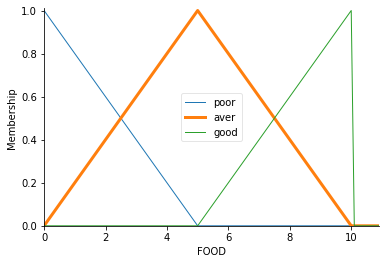

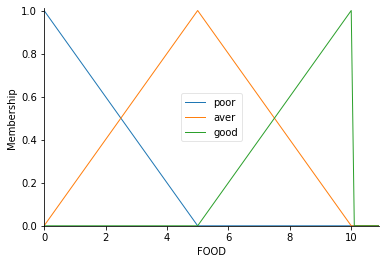

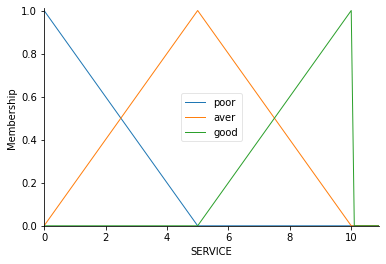

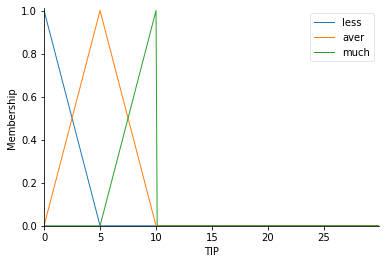

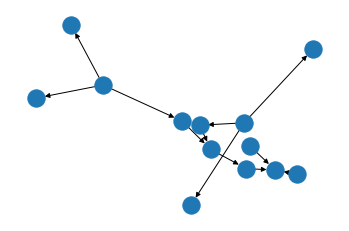

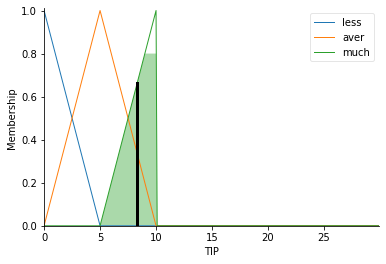

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
##################################
food = ctrl.Antecedent(np.arange(0,11,0.1), "FOOD")
service = ctrl.Antecedent(np.arange(0,11,0.1), "SERVICE")
tip= ctrl.Consequent(np.arange(0,30,0.1),"TIP")
### FOOD
food["poor"]=fuzz.trimf(food.universe,[0,0,5])
food["aver"]=fuzz.trimf(food.universe,[0,5,10])
food["good"]=fuzz.trimf(food.universe,[5,10,10])
### SERVICE
service["poor"]=fuzz.trimf(service.universe,[0,0,5])
service["aver"]=fuzz.trimf(service.universe,[0,5,10])
service["good"]=fuzz.trimf(service.universe,[5,10,10])
### TIP
tip["less"]=fuzz.trimf(tip.universe,[0,0,5])
tip["aver"]=fuzz.trimf(tip.universe,[0,5,10])
tip["much"]=fuzz.trimf(tip.universe,[5,10,10])
########
food["aver"].view()# nhấn mạnh 
food.view()
service.view()
tip.view()

rule_1=ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule_2=ctrl.Rule(food['poor'] & service['aver'],tip['less'])
rule_3=ctrl.Rule(food['poor'] & service['good'],tip['aver'])
rule_4=ctrl.Rule(food['aver'] & service['poor'],tip['less'])
rule_5=ctrl.Rule(food['aver'] & service['aver'],tip['aver'])
rule_6=ctrl.Rule(food['aver'] & service['good'],tip['much'])
rule_7=ctrl.Rule(food['good'] & service['poor'],tip['less'])
rule_8=ctrl.Rule(food['good'] & service['aver'],tip['aver'])
rule_9=ctrl.Rule(food['good'] & service['good'],tip['much'])

rule_1.view()

tipping_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4, rule_5, rule_6, rule_7, rule_8, rule_9])
tipping =ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['FOOD']=9
tipping.input['SERVICE']=10
tipping.compute()
print(tipping.output['TIP'])
tip.view(sim=tipping)